<a href="https://colab.research.google.com/github/ToheedAsghar/Smart_Meters_In_London_AI_Project/blob/main/Smart_Meters_In_London%5BUpdated%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Preparation


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dates
# % matplotlib inline
import seaborn as sns

In [3]:
# getting acorn details
acorn_details = pd.read_csv('/content/drive/MyDrive/SmartMeter_DataSet/acorn_details.csv', encoding='ISO-8859-1')

#displaying the structure of the acorn_details
acorn_details.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 826 entries, 0 to 825
Data columns (total 20 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   MAIN CATEGORIES  826 non-null    object 
 1   CATEGORIES       826 non-null    object 
 2   REFERENCE        825 non-null    object 
 3   ACORN-A          826 non-null    float64
 4   ACORN-B          826 non-null    float64
 5   ACORN-C          826 non-null    float64
 6   ACORN-D          826 non-null    float64
 7   ACORN-E          826 non-null    float64
 8   ACORN-F          826 non-null    float64
 9   ACORN-G          826 non-null    float64
 10  ACORN-H          826 non-null    float64
 11  ACORN-I          826 non-null    float64
 12  ACORN-J          826 non-null    float64
 13  ACORN-K          826 non-null    float64
 14  ACORN-L          826 non-null    float64
 15  ACORN-M          826 non-null    float64
 16  ACORN-N          826 non-null    float64
 17  ACORN-O         

In [4]:
#displaying first 5 rows
acorn_details.head()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
0,POPULATION,Age,Age 0-4,77.0,83.0,72.0,100.0,120.0,77.0,97.0,97.0,63.0,119.0,67.0,114.0,113.0,89.0,123.0,138.0,133.0
1,POPULATION,Age,Age 5-17,117.0,109.0,87.0,69.0,94.0,95.0,102.0,106.0,67.0,95.0,64.0,108.0,116.0,86.0,89.0,136.0,106.0
2,POPULATION,Age,Age 18-24,64.0,73.0,67.0,107.0,100.0,71.0,83.0,89.0,62.0,104.0,459.0,97.0,96.0,86.0,117.0,109.0,110.0
3,POPULATION,Age,Age 25-34,52.0,63.0,62.0,197.0,151.0,66.0,90.0,88.0,63.0,132.0,145.0,109.0,96.0,90.0,140.0,120.0,120.0
4,POPULATION,Age,Age 35-49,102.0,105.0,91.0,124.0,118.0,93.0,102.0,103.0,76.0,111.0,67.0,99.0,98.0,90.0,102.0,103.0,100.0


In [5]:
#displaying the last 5 rows
acorn_details.tail()

,MAIN CATEGORIES,CATEGORIES,REFERENCE,ACORN-A,ACORN-B,ACORN-C,ACORN-D,ACORN-E,ACORN-F,ACORN-G,ACORN-H,ACORN-I,ACORN-J,ACORN-K,ACORN-L,ACORN-M,ACORN-N,ACORN-O,ACORN-P,ACORN-Q
821,LEISURE TIME,Holiday Destination/Type,Asia,171.0,137.0,94.0,220.0,196.0,69.0,122.0,95.0,72.0,97.0,124.0,73.0,57.0,49.0,96.0,113.0,63.0
822,LEISURE TIME,Holiday Destination/Type,Activity / Outdoor Sports,298.0,278.0,138.0,119.0,93.0,96.0,113.0,96.0,84.0,96.0,56.0,48.0,48.0,46.0,23.0,23.0,23.0
823,LEISURE TIME,Holiday Destination/Type,Cruise,272.0,295.0,272.0,44.0,44.0,70.0,70.0,70.0,70.0,70.0,28.0,28.0,28.0,28.0,49.0,49.0,49.0
824,LEISURE TIME,Holiday Destination/Type,Package,196.0,186.0,166.0,49.0,49.0,101.0,101.0,121.0,106.0,101.0,48.0,75.0,75.0,75.0,54.0,54.0,54.0
825,LEISURE TIME,Holiday Destination/Type,Self-catering,308.0,181.0,181.0,55.0,55.0,127.0,147.0,124.0,113.0,166.0,44.0,44.0,44.0,33.0,32.0,35.0,35.0


In [6]:
#getting the information_households file
info_households = pd.read_csv('/content/drive/MyDrive/SmartMeter_DataSet/informations_households.csv', encoding='ISO-8859-1')

#displaying the structure of the infor_households
info_households.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB


In [7]:
#displaying the first 5 rows of the file
info_households.head()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [8]:
#displaying the first 5 rows of the file
info_households.tail()

,LCLid,stdorToU,Acorn,Acorn_grouped,file
5561,MAC002056,Std,ACORN-U,ACORN-U,block_111
5562,MAC004587,Std,ACORN-U,ACORN-U,block_111
5563,MAC004828,Std,ACORN-U,ACORN-U,block_111
5564,MAC001704,ToU,ACORN-U,ACORN-U,block_111
5565,MAC002774,ToU,ACORN-U,ACORN-U,block_111


In [9]:
# getting the weather_daily_darksky file
weather_daily = pd.read_csv('/content/drive/MyDrive/SmartMeter_DataSet/weather_daily_darksky.csv', encoding='ISO-8859-1')

#displaying the structure of the weather_daily_darksky
weather_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humidity            

In [10]:
# displaying the front 5 rows of the file
weather_daily.head()

,temperatureMax,temperatureMaxTime,windBearing,icon,dewPoint,temperatureMinTime,cloudCover,windSpeed,pressure,apparentTemperatureMinTime,...,temperatureHigh,sunriseTime,temperatureHighTime,uvIndexTime,summary,temperatureLowTime,apparentTemperatureMin,apparentTemperatureMaxTime,apparentTemperatureLowTime,moonPhase
0,11.96,2011-11-11 23:00:00,123,fog,9.40,2011-11-11 07:00:00,0.79,3.88,1016.08,2011-11-11 07:00:00,...,10.87,2011-11-11 07:12:14,2011-11-11 19:00:00,2011-11-11 11:00:00,Foggy until afternoon.,2011-11-11 19:00:00,6.48,2011-11-11 23:00:00,2011-11-11 19:00:00,0.52
1,8.59,2011-12-11 14:00:00,198,partly-cloudy-day,4.49,2011-12-11 01:00:00,0.56,3.94,1007.71,2011-12-11 02:00:00,...,8.59,2011-12-11 07:57:02,2011-12-11 14:00:00,2011-12-11 12:00:00,Partly cloudy throughout the day.,2011-12-12 07:00:00,0.11,2011-12-11 20:00:00,2011-12-12 08:00:00,0.53
2,10.33,2011-12-27 02:00:00,225,partly-cloudy-day,5.47,2011-12-27 23:00:00,0.85,3.54,1032.76,2011-12-27 22:00:00,...,10.33,2011-12-27 08:07:06,2011-12-27 14:00:00,2011-12-27 00:00:00,Mostly cloudy throughout the day.,2011-12-27 23:00:00,5.59,2011-12-27 02:00:00,2011-12-28 00:00:00,0.10
3,8.07,2011-12-02 23:00:00,232,wind,3.69,2011-12-02 07:00:00,0.32,3.00,1012.12,2011-12-02 07:00:00,...,7.36,2011-12-02 07:46:09,2011-12-02 12:00:00,2011-12-02 10:00:00,Partly cloudy throughout the day and breezy ov...,2011-12-02 19:00:00,0.46,2011-12-02 12:00:00,2011-12-02 19:00:00,0.25
4,8.22,2011-12-24 23:00:00,252,partly-cloudy-night,2.79,2011-12-24 07:00:00,0.37,4.46,1028.17,2011-12-24 07:00:00,...,7.93,2011-12-24 08:06:15,2011-12-24 15:00:00,2011-12-24 13:00:00,Mostly cloudy throughout the day.,2011-12-24 19:00:00,-0.51,2011-12-24 23:00:00,2011-12-24 20:00:00,0.99


For weather daily information we are going to use “temperatureMaxTime” (to extract the date), “temperatureMin” and “temperatureHigh” variables (to calculate the average temperature per day).
We also are going to add “Year”,“Year_month” and “weekend” variables to this data.

In [11]:
dates_data = pd.to_datetime(weather_daily['temperatureMaxTime'])
dates_data.dt.to_period('D')

,temperatureMaxTime
0,2011-11-11
1,2011-12-11
2,2011-12-27
3,2011-12-02
4,2011-12-24
...,...
877,2014-01-26
878,2014-02-27
879,2014-03-09
880,2014-02-12


In [12]:
#labeling the days extracted now as weekend or weekdays
weekday = np.where(dates_data.dt.dayofweek < 5, 'Weekday', 'Weekend')

In [13]:
# converting the array to pd series object
weekday = pd.Series(weekday)
weekday

,0
0,Weekday
1,Weekend
2,Weekday
3,Weekday
4,Weekend
...,...
877,Weekend
878,Weekday
879,Weekend
880,Weekday


In [14]:
# introducing a new variable "workday_weekend" in our weather_daily_darksky file
weather_daily['workday_Weekends'] = weekday
weather_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humidity            

In [15]:
# introducing a new variable avg from temperature min and temperature max
weather_daily['avgTemperature'] = (weather_daily['temperatureMin'] + weather_daily['temperatureHigh'])/2
weather_daily.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 882 entries, 0 to 881
Data columns (total 34 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   temperatureMax               882 non-null    float64
 1   temperatureMaxTime           882 non-null    object 
 2   windBearing                  882 non-null    int64  
 3   icon                         882 non-null    object 
 4   dewPoint                     882 non-null    float64
 5   temperatureMinTime           882 non-null    object 
 6   cloudCover                   881 non-null    float64
 7   windSpeed                    882 non-null    float64
 8   pressure                     882 non-null    float64
 9   apparentTemperatureMinTime   882 non-null    object 
 10  apparentTemperatureHigh      882 non-null    float64
 11  precipType                   882 non-null    object 
 12  visibility                   882 non-null    float64
 13  humidity            

In [16]:
# displaying the average temperature
weather_daily['avgTemperature'].head()

,avgTemperature
0,9.860
1,5.535
2,9.180
3,4.960
4,5.550


In [17]:
# introducing the new variable year for better understanding of the data year-wise
weather_daily['year'] = dates_data.map(lambda x: x.strftime('%Y'))

# similarly introducing a new variable year-month for more detail regarding months in years
weather_daily['year-month'] = dates_data.map(lambda x: x.strftime('%Y-%m'))

#displaying all new introduced variables
weather_daily[['workday_Weekends', 'avgTemperature', 'year', 'year-month']].head()

,workday_Weekends,avgTemperature,year,year-month
0,Weekday,9.860,2011,2011-11
1,Weekend,5.535,2011,2011-12
2,Weekday,9.180,2011,2011-12
3,Weekday,4.960,2011,2011-12
4,Weekend,5.550,2011,2011-12


For information_households table:


*   Acorn_grouped variables doesn't correctly match with acorn information that's why we need to map acorn information with correct acron groups.
*   Randomly Select 5 blocks (1, 10, 70, 75, 105) covering 5 main Acorn Group Information (Affluent, Rising, Comfortable, Stretched, Adversity).
*   These 5 datasets will be combined into one large dataset which will be named as "all_blocks".
*   Then user informations in information_households will be combined with "all_blocks" table.




In [18]:
# displaying information_households again
info_households.info()
info_households.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB


,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,ACORN-,block_0
1,MAC001074,ToU,ACORN-,ACORN-,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [19]:
# getting unique accorn-letters
acorn_letter = info_households['Acorn'].unique()
acorn_letter

array(['ACORN-', 'ACORN-A', 'ACORN-B', 'ACORN-C', 'ACORN-D', 'ACORN-E',
       'ACORN-F', 'ACORN-G', 'ACORN-H', 'ACORN-I', 'ACORN-J', 'ACORN-K',
       'ACORN-L', 'ACORN-M', 'ACORN-N', 'ACORN-O', 'ACORN-P', 'ACORN-Q',
       'ACORN-U'], dtype=object)

In [20]:
# getting the 5 unique groups from acorn_groups
acorn_groups = info_households['Acorn_grouped'].unique()
acorn_groups

array(['ACORN-', 'Affluent', 'Comfortable', 'Adversity', 'ACORN-U'],
      dtype=object)

In [21]:
# mapping each acorn group with it's name
acorn_class = dict()
acorn = info_households['Acorn']

for al in acorn_letter:
  acorn_class[al] = info_households['Acorn_grouped'].iloc[acorn[acorn==al].index[0]]

acorn_class

{'ACORN-': 'ACORN-',
 'ACORN-A': 'Affluent',
 'ACORN-B': 'Affluent',
 'ACORN-C': 'Affluent',
 'ACORN-D': 'Affluent',
 'ACORN-E': 'Affluent',
 'ACORN-F': 'Comfortable',
 'ACORN-G': 'Comfortable',
 'ACORN-H': 'Comfortable',
 'ACORN-I': 'Comfortable',
 'ACORN-J': 'Comfortable',
 'ACORN-K': 'Adversity',
 'ACORN-L': 'Adversity',
 'ACORN-M': 'Adversity',
 'ACORN-N': 'Adversity',
 'ACORN-O': 'Adversity',
 'ACORN-P': 'Adversity',
 'ACORN-Q': 'Adversity',
 'ACORN-U': 'ACORN-U'}

In [22]:
# understanding the condition
acorn[acorn=='ACORN-B'].index[0]

159

In [23]:
# renaming the acorn_information with correct acorn_groups
acorn_class['ACORN-D'] = 'Rising'
acorn_class['ACORN-E'] = 'Rising'
acorn_class['ACORN-K'] = 'Stretched'
acorn_class['ACORN-L'] = 'Stretched'
acorn_class['ACORN-M'] = 'Stretched'
acorn_class['ACORN-N'] = 'Stretched'
acorn_class['ACORN-'] = 'NotPrivate_Houshold'
acorn_class['ACORN-U'] = 'NotPrivate_Houshold'

#implementing the change in info_households
for al, ac in acorn_class.items():
  info_households['Acorn_grouped'][info_households['Acorn']==al] = ac

In [24]:
# displaying the instance of the new dataframe
info_households[info_households['Acorn'] == 'ACORN-D']

,LCLid,stdorToU,Acorn,Acorn_grouped,file
335,MAC004539,Std,ACORN-D,Rising,block_6
336,MAC000336,ToU,ACORN-D,Rising,block_6
337,MAC000342,ToU,ACORN-D,Rising,block_6
338,MAC001698,Std,ACORN-D,Rising,block_6
339,MAC000727,Std,ACORN-D,Rising,block_6
...,...,...,...,...,...
622,MAC005205,Std,ACORN-D,Rising,block_12
623,MAC000291,Std,ACORN-D,Rising,block_12
624,MAC002670,Std,ACORN-D,Rising,block_12
625,MAC002144,Std,ACORN-D,Rising,block_12


In [25]:
# displaying info_households again for revision of fields
info_households.info()
info_households.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5566 entries, 0 to 5565
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   LCLid          5566 non-null   object
 1   stdorToU       5566 non-null   object
 2   Acorn          5566 non-null   object
 3   Acorn_grouped  5566 non-null   object
 4   file           5566 non-null   object
dtypes: object(5)
memory usage: 217.5+ KB


,LCLid,stdorToU,Acorn,Acorn_grouped,file
0,MAC005492,ToU,ACORN-,NotPrivate_Houshold,block_0
1,MAC001074,ToU,ACORN-,NotPrivate_Houshold,block_0
2,MAC000002,Std,ACORN-A,Affluent,block_0
3,MAC003613,Std,ACORN-A,Affluent,block_0
4,MAC003597,Std,ACORN-A,Affluent,block_0


In [26]:
# moving towards the next step which was to randomly select 5 blocks

blocks = ["block_1", "block_10", "block_70", "block_75", "block_105"]

# selecting the record of only those blocks which we've selected
info_blocks = info_households[info_households['file'].isin(blocks)]

# displying the records
info_blocks

,LCLid,stdorToU,Acorn,Acorn_grouped,file
50,MAC003840,Std,ACORN-A,Affluent,block_1
51,MAC003212,Std,ACORN-A,Affluent,block_1
52,MAC003182,Std,ACORN-A,Affluent,block_1
53,MAC003166,Std,ACORN-A,Affluent,block_1
54,MAC001628,Std,ACORN-A,Affluent,block_1
...,...,...,...,...,...
5295,MAC001839,Std,ACORN-Q,Adversity,block_105
5296,MAC002045,Std,ACORN-Q,Adversity,block_105
5297,MAC002053,Std,ACORN-Q,Adversity,block_105
5298,MAC002054,Std,ACORN-Q,Adversity,block_105


In [27]:
# displaying the count of blocks falling in acorn_groups
info_blocks['Acorn_grouped'].value_counts()
# the sum of counts should be 250 as we get 250x5 previously

,count
Acorn_grouped,
Affluent,50
Rising,50
Comfortable,50
Stretched,50
Adversity,50


In [28]:
# moving towards 3rd step which was to get the blocks dataset and
# combine them into one big dataset

block_1 = pd.read_csv('/content/drive/MyDrive/SmartMeter_DataSet/daily_dataset/daily_dataset/block_1.csv', encoding='ISO-8859-1')
block_10 = pd.read_csv('/content/drive/MyDrive/SmartMeter_DataSet/daily_dataset/daily_dataset/block_10.csv', encoding='ISO-8859-1')
block_70 = pd.read_csv('/content/drive/MyDrive/SmartMeter_DataSet/daily_dataset/daily_dataset/block_70.csv', encoding='ISO-8859-1')
block_75 = pd.read_csv('/content/drive/MyDrive/SmartMeter_DataSet/daily_dataset/daily_dataset/block_75.csv', encoding='ISO-8859-1')
block_105 = pd.read_csv('/content/drive/MyDrive/SmartMeter_DataSet/daily_dataset/daily_dataset/block_105.csv', encoding='ISO-8859-1')

In [29]:
# creating a list of all dataframes
blocks = [block_1, block_10, block_70, block_75, block_105]

#conatenating them
all_blocks = pd.concat(blocks)

#displaying the structure of the all_blocks
all_blocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157584 entries, 0 to 32097
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LCLid          157584 non-null  object 
 1   day            157584 non-null  object 
 2   energy_median  157580 non-null  float64
 3   energy_mean    157580 non-null  float64
 4   energy_max     157580 non-null  float64
 5   energy_count   157584 non-null  int64  
 6   energy_std     157064 non-null  float64
 7   energy_sum     157580 non-null  float64
 8   energy_min     157580 non-null  float64
dtypes: float64(6), int64(1), object(2)
memory usage: 12.0+ MB


In [30]:
# merging both the dataframes
all_blocks = pd.merge(all_blocks, info_households, on='LCLid')

#displaying the structure of the merged dataframe
all_blocks.info()

#displaying the top 5 records
all_blocks.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157584 entries, 0 to 157583
Data columns (total 13 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   LCLid          157584 non-null  object 
 1   day            157584 non-null  object 
 2   energy_median  157580 non-null  float64
 3   energy_mean    157580 non-null  float64
 4   energy_max     157580 non-null  float64
 5   energy_count   157584 non-null  int64  
 6   energy_std     157064 non-null  float64
 7   energy_sum     157580 non-null  float64
 8   energy_min     157580 non-null  float64
 9   stdorToU       157584 non-null  object 
 10  Acorn          157584 non-null  object 
 11  Acorn_grouped  157584 non-null  object 
 12  file           157584 non-null  object 
dtypes: float64(6), int64(1), object(6)
memory usage: 15.6+ MB


,LCLid,day,energy_median,energy_mean,energy_max,energy_count,energy_std,energy_sum,energy_min,stdorToU,Acorn,Acorn_grouped,file
0,MAC000323,2012-03-06,0.5460,0.567700,0.908,20,0.235788,11.354,0.138,Std,ACORN-A,Affluent,block_1
1,MAC000323,2012-03-07,0.2195,0.386062,1.475,48,0.348265,18.531,0.054,Std,ACORN-A,Affluent,block_1
2,MAC000323,2012-03-08,0.1695,0.290937,1.086,48,0.262756,13.965,0.056,Std,ACORN-A,Affluent,block_1
3,MAC000323,2012-03-09,0.2605,0.423812,1.587,48,0.402155,20.343,0.068,Std,ACORN-A,Affluent,block_1
4,MAC000323,2012-03-10,0.2680,0.373813,1.222,48,0.308453,17.943,0.061,Std,ACORN-A,Affluent,block_1


In [31]:
# introducing new variables (refer to ) for more understanding of data with dates
all_blocks['day'] = pd.to_datetime(all_blocks['day'])
all_blocks['year'] = pd.to_datetime(all_blocks['day']).dt.year
all_blocks['year-month'] = pd.to_datetime(all_blocks['day']).map(lambda x: x.strftime('%Y-%m'))

# deleting the rows with null value if any
all_blocks.dropna(inplace=True)

# displaying the structure of the
all_blocks.info()

<class 'pandas.core.frame.DataFrame'>
Index: 157064 entries, 0 to 157582
Data columns (total 15 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   LCLid          157064 non-null  object        
 1   day            157064 non-null  datetime64[ns]
 2   energy_median  157064 non-null  float64       
 3   energy_mean    157064 non-null  float64       
 4   energy_max     157064 non-null  float64       
 5   energy_count   157064 non-null  int64         
 6   energy_std     157064 non-null  float64       
 7   energy_sum     157064 non-null  float64       
 8   energy_min     157064 non-null  float64       
 9   stdorToU       157064 non-null  object        
 10  Acorn          157064 non-null  object        
 11  Acorn_grouped  157064 non-null  object        
 12  file           157064 non-null  object        
 13  year           157064 non-null  int32         
 14  year-month     157064 non-null  object        
dtypes: da

In [32]:
all_blocks['Acorn_grouped'].value_counts()

,count
Acorn_grouped,
Stretched,32770
Adversity,31951
Rising,31703
Affluent,31609
Comfortable,29031


<h2>3. Energy Consumption Analysis </h2>

Analyzing the Energy Consumption which will help in Predicting the Future Energy Consumptions.


<h3> 3.1 Monthly Energy Analysis throughout the Given Years </h3>

In [33]:
# average temperature per month and reset index so that we can have the year-month field
# instead of it as index
weather_monthly = weather_daily.groupby('year-month')['avgTemperature'].mean().reset_index()

# displaying the montly weather means
weather_monthly.head()

,year-month,avgTemperature
0,2011-11,10.478167
1,2011-12,6.712097
2,2012-01,6.668871
3,2012-02,4.916897
4,2012-03,9.715000


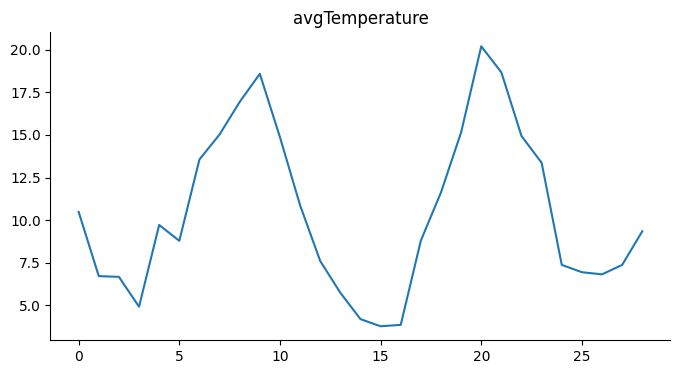

In [34]:
# displaying average temperature per month
weather_monthly['avgTemperature'].plot(kind='line', figsize=(8, 4), title='avgTemperature')
plt.gca().spines[['top', 'right']].set_visible(False)

In [35]:
# now calculating the average energy consumption per month
energy_sum_mean = all_blocks.groupby('year-month')['energy_sum'].mean().reset_index()
energy_sum_mean.rename(columns={'energy_sum' : 'energy_sum_mean'}, inplace=True)

#displaying the enery_sum_mean
energy_sum_mean.head()

,year-month,energy_sum_mean
0,2011-11,16.987333
1,2011-12,12.652734
2,2012-01,12.280735
3,2012-02,12.161116
4,2012-03,11.106684


In [36]:
energy_sum_total = all_blocks.groupby('year-month')['energy_sum'].sum().reset_index()
energy_sum_total.rename(columns={'energy_sum' : 'energy_sum_total'}, inplace=True)
#displaying the enery_sum_mean
energy_sum_total.head()

,year-month,energy_sum_total
0,2011-11,50.962000
1,2011-12,1619.550000
2,2012-01,2775.446001
3,2012-02,4827.962999
4,2012-03,8396.653001


from matplotlib import pyplot as plt
_df_0['energy_sum_total'].plot(kind='hist', bins=20, title='energy_sum_total')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('year-month').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['energy_sum_total']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'energy_sum_total'}, axis=1)
              .sort_values('energy_sum_total', ascending=True))
  xs = counted['energy_sum_total']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = _df_2.sort_values('energy_sum_total', ascending=True)
for i, (series_name, series) in enumerate(df_sorted.groupby('year-month')):
  _plot_series(series, series_name, i)
  fig.legend(title='year-month', bbox_to_anchor=(1, 1), loc='upper left')
sns.despine(fig=fig, ax=ax)
plt.xlabel('energy_sum_total')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
_df_3['energy_sum_total'].plot(kind='line', figsize=(8, 4), title='energy_sum_total')
plt.gca().spines[['top', 'right']].set_visible(False)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_4['year-month'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_4, x='energy_sum_total', y='year-month', inner='stick', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

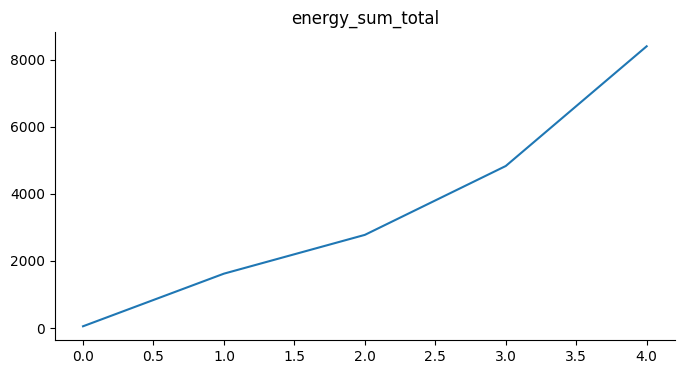

In [38]:
from matplotlib import pyplot as plt
_df_3['energy_sum_total'].plot(kind='line', figsize=(8, 4), title='energy_sum_total')
plt.gca().spines[['top', 'right']].set_visible(False)

In [39]:
# just merging both the fields according to year-month
year_month_grp_eng = pd.concat([energy_sum_mean, energy_sum_total['energy_sum_total']], axis=1)

# displaying the datatable
year_month_grp_eng.head()

,year-month,energy_sum_mean,energy_sum_total
0,2011-11,16.987333,50.962000
1,2011-12,12.652734,1619.550000
2,2012-01,12.280735,2775.446001
3,2012-02,12.161116,4827.962999
4,2012-03,11.106684,8396.653001


In [40]:
weather_monthly.drop(28, inplace=True)

In [41]:
# concatenating the two tables with respect to year_month
all_year_month_eng_wth = pd.concat([weather_monthly, year_month_grp_eng['energy_sum_mean'], year_month_grp_eng['energy_sum_total']], axis = 1)

all_year_month_eng_wth.head()

,year-month,avgTemperature,energy_sum_mean,energy_sum_total
0,2011-11,10.478167,16.987333,50.962000
1,2011-12,6.712097,12.652734,1619.550000
2,2012-01,6.668871,12.280735,2775.446001
3,2012-02,4.916897,12.161116,4827.962999
4,2012-03,9.715000,11.106684,8396.653001


In [42]:
# adding an year field
all_year_month_eng_wth['year'] = pd.to_datetime(all_year_month_eng_wth['year-month']).dt.year

# displaying the data with year field added
all_year_month_eng_wth.head()

,year-month,avgTemperature,energy_sum_mean,energy_sum_total,year
0,2011-11,10.478167,16.987333,50.962000,2011
1,2011-12,6.712097,12.652734,1619.550000,2011
2,2012-01,6.668871,12.280735,2775.446001,2012
3,2012-02,4.916897,12.161116,4827.962999,2012
4,2012-03,9.715000,11.106684,8396.653001,2012


In [43]:
from datetime import datetime

datelist = all_year_month_eng_wth['year-month'].values
x_axis = list(map(datetime.strptime, datelist, len(datelist)*['%Y-%m']))

# contains the dates in format year, month, day, hour, min, sec
x_axis

[datetime.datetime(2011, 11, 1, 0, 0),
 datetime.datetime(2011, 12, 1, 0, 0),
 datetime.datetime(2012, 1, 1, 0, 0),
 datetime.datetime(2012, 2, 1, 0, 0),
 datetime.datetime(2012, 3, 1, 0, 0),
 datetime.datetime(2012, 4, 1, 0, 0),
 datetime.datetime(2012, 5, 1, 0, 0),
 datetime.datetime(2012, 6, 1, 0, 0),
 datetime.datetime(2012, 7, 1, 0, 0),
 datetime.datetime(2012, 8, 1, 0, 0),
 datetime.datetime(2012, 9, 1, 0, 0),
 datetime.datetime(2012, 10, 1, 0, 0),
 datetime.datetime(2012, 11, 1, 0, 0),
 datetime.datetime(2012, 12, 1, 0, 0),
 datetime.datetime(2013, 1, 1, 0, 0),
 datetime.datetime(2013, 2, 1, 0, 0),
 datetime.datetime(2013, 3, 1, 0, 0),
 datetime.datetime(2013, 4, 1, 0, 0),
 datetime.datetime(2013, 5, 1, 0, 0),
 datetime.datetime(2013, 6, 1, 0, 0),
 datetime.datetime(2013, 7, 1, 0, 0),
 datetime.datetime(2013, 8, 1, 0, 0),
 datetime.datetime(2013, 9, 1, 0, 0),
 datetime.datetime(2013, 10, 1, 0, 0),
 datetime.datetime(2013, 11, 1, 0, 0),
 datetime.datetime(2013, 12, 1, 0, 0),
 dat

In [44]:
formatter = dates.DateFormatter('%Y-%m')

In [45]:
y_axis = all_year_month_eng_wth['energy_sum_mean'].values
y_axis2 = all_year_month_eng_wth['avgTemperature'].values

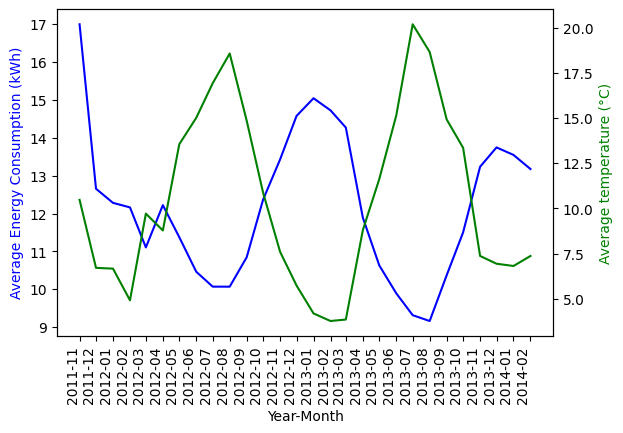

In [46]:
plt.plot( x_axis, y_axis,'b')
ax1 = plt.gcf().axes[0]
ax1.xaxis.set_major_formatter(formatter)
ax2 = ax1.twinx()
ax2.plot(x_axis,y_axis2,'g')
ax1.set_xlabel('Year-Month')
ax1.set_ylabel('Average Energy Consumption (kWh)', color='b')
ax2.set_ylabel('Average temperature (°C)', color='g')
plt.xticks(x_axis)
plt.gcf().autofmt_xdate(rotation=90)
plt.show()

Energy consumption decreases are the temperature increase or energy consumption increases as the temperature decreases. Except with the data on 2011-11 (first half) seems odd and shows a singular situation.
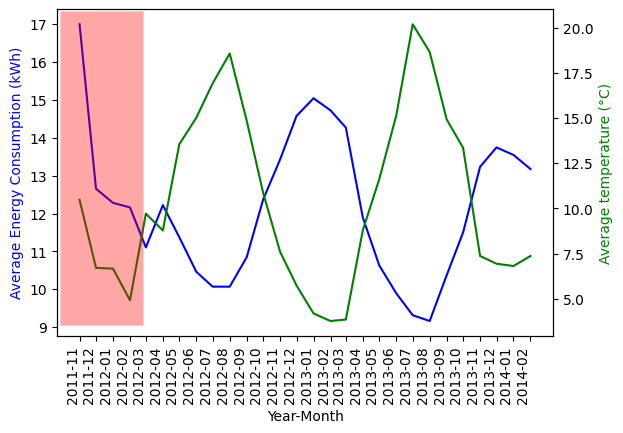


That is, the energy consumption for the firs tonth is the highest amount in our sample data.

<h3>3.2 Energy Consumption Differences Betwee Acorn Groups </h3>

In [47]:
all_bl = all_blocks[all_blocks.year != 2011]
ag_comp = all_bl.groupby(['year', 'Acorn_grouped'])['energy_sum'].sum()

ag_comp

year  Acorn_grouped
2012  Adversity         80276.334999
      Affluent         204016.408999
      Comfortable       84711.034003
      Rising           162434.606995
      Stretched        120911.350996
2013  Adversity        135803.023997
      Affluent         331108.142995
      Comfortable      171079.846003
      Rising           233277.140008
      Stretched        181460.678006
2014  Adversity         23114.637000
      Affluent          58604.125002
      Comfortable       29066.325001
      Rising            39584.119996
      Stretched         31034.510000
Name: energy_sum, dtype: float64

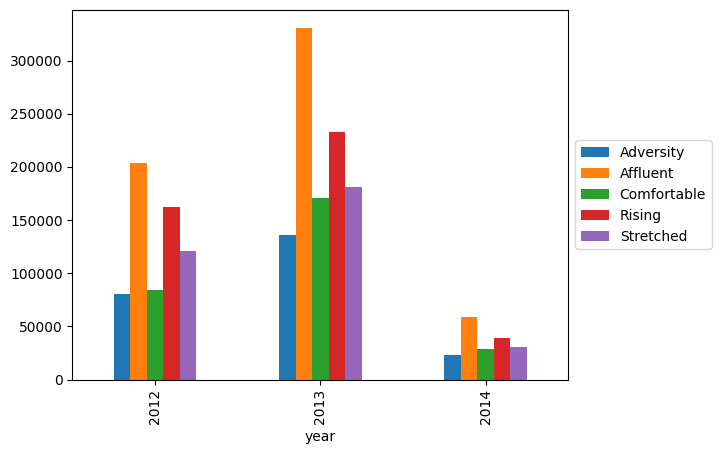

In [48]:
ag_comp.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

 The wealthiest groups consume much more electricity than the underpriviledged groups.

<h3>3.3 Weekend and Workday Energy Consumption Comparison </h3>

In [49]:
# naming workdays/weekends (seen)
weekday = np.where(all_blocks['day'].dt.dayofweek < 5, 'WorkDay', 'Weekend')
all_blocks['workday-Weekends'] = weekday

all_blocks[['LCLid','Acorn','file', 'workday-Weekends']].head()

,LCLid,Acorn,file,workday-Weekends
0,MAC000323,ACORN-A,block_1,WorkDay
1,MAC000323,ACORN-A,block_1,WorkDay
2,MAC000323,ACORN-A,block_1,WorkDay
3,MAC000323,ACORN-A,block_1,WorkDay
4,MAC000323,ACORN-A,block_1,Weekend


In [50]:
all_bl2 = all_blocks[all_blocks.year.isin([2012, 2013])]
ag_comp2 = all_bl2.groupby(['year', 'workday-Weekends'])['energy_sum'].sum()

ag_comp2

year  workday-Weekends
2012  Weekend             192927.387003
      WorkDay             459422.348988
2013  Weekend             309233.144995
      WorkDay             743495.686013
Name: energy_sum, dtype: float64

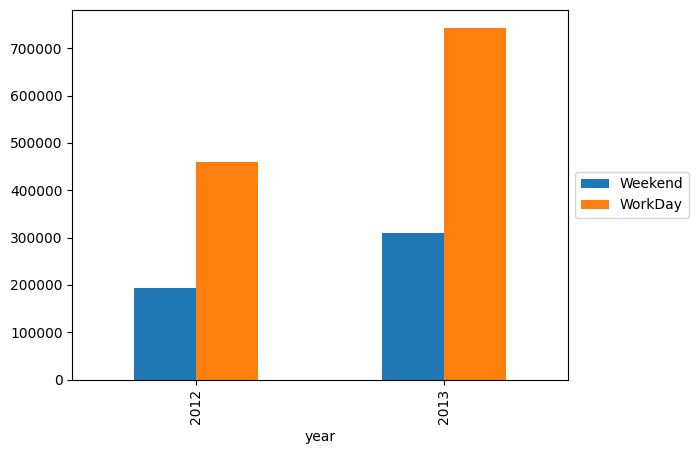

In [51]:
ag_comp2.unstack().plot(kind='bar')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

<h2> Predictions on the Energy Consumption </h2>

Predicting the Montly Energy Consumption using a single Dependent Variable: avgTemperature.

Plotting and checking if they're following a common shape.



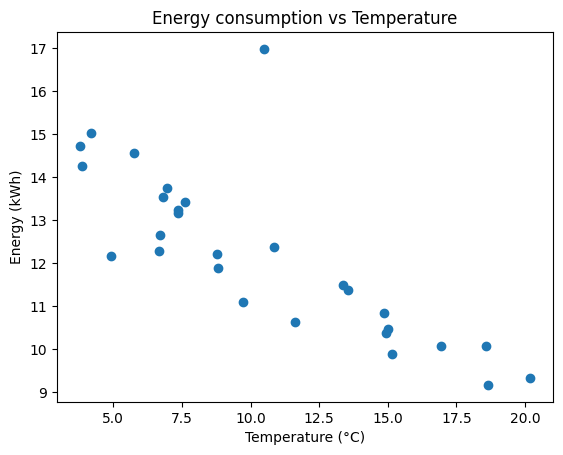

In [52]:
plt.scatter(all_year_month_eng_wth['avgTemperature'].values,all_year_month_eng_wth['energy_sum_mean'].values)
plt.title('Energy consumption vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy (kWh)')
plt.show()

As the energy varies linearly (-ve) with the temperature. A Linear Regression model would be a great starting point for our machine learning model.

In [53]:
from sklearn.model_selection import train_test_split # Import train_test_split from the correct module
X = all_year_month_eng_wth['avgTemperature'].values
y = all_year_month_eng_wth['energy_sum_mean'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)
X_train = X_train.reshape(-1,1)
X_test = X_test.reshape(-1,1)

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [58]:
y_pred = regressor.predict(X_test)

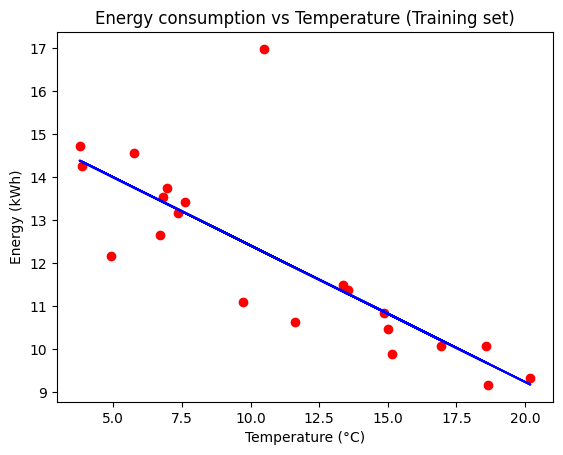

In [59]:
plt.scatter(X_train, y_train, color='red')
plt.plot(X_train, regressor.predict(X_train), color='blue')
plt.title('Energy consumption vs Temperature (Training set)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy (kWh)')
plt.show()

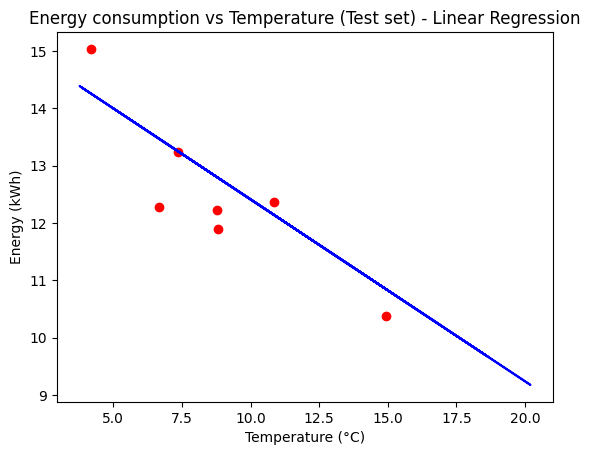

In [60]:
plt.scatter(X_test, y_test, color = 'red')
plt.plot(X_train, regressor.predict(X_train), color = 'blue')
plt.title('Energy consumption vs Temperature (Test set) - Linear Regression')
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy (kWh)')
plt.show()

Now, let's compare this linear regression model with other ML models: SVR, K-NN, and Random Forest regressions.
We will first perform k-fold cross validation for each of these models and apply the mean squared error as a metrics.